# 🌫️ Clustering Air Pollution Patterns in Indian Cities (2022–2025)  
## An Unsupervised Learning Approach  



<!-- ## 📖 Problem Statement  

Air pollution varies significantly across Indian cities due to geography, seasons, industry, and traffic. This project applies **unsupervised learning** to discover hidden pollution patterns and group cities or time periods based on raw pollutant and weather data — **without using labeled AQI categories**.  

The goal is to reveal natural clusters and regional differences that can support **better-targeted clean-air actions and policies** across India.  




## 🎯 Objectives  

- Clean and preprocess recent **multi-city air quality data (2022–2025)**.  
- Perform **dimensionality reduction** using **PCA / t-SNE** to visualize pollution patterns.  
- Apply clustering algorithms such as **K-Means, DBSCAN, and Hierarchical Clustering** to group cities or monitoring stations by pollution profiles.  
- Interpret clusters to identify pollution types (e.g., *northern winter haze vs. southern coastal patterns*).  
- Highlight vulnerable regions and provide insights for **public health and environmental policy**, including a **southern / Kerala context**.   -->
## 📖 Problem Statement  

Designed a data-driven system to analyze air pollution patterns across Indian cities using **unsupervised machine learning**. Instead of relying on predefined AQI labels, the project discovers **natural pollution clusters** from pollutant and weather features, enabling the identification of **high-risk and low-risk environments**. By evaluating **city-wise and seasonal cluster behavior**, the solution provides actionable insights to support **targeted air-quality monitoring and environmental planning**.  

---

## 🎯 Objectives  

- Preprocessed and standardized multi-city air quality and meteorological datasets.  
- Built and tuned **unsupervised clustering models** (K-Means, DBSCAN, Hierarchical) to uncover pollution patterns.  
- Performed **cluster profiling** to explain pollutant characteristics and risk levels.  
- Analyzed **city-wise and seasonal cluster distribution** to identify vulnerable and cleaner regions.  
- Generated **data-driven insights** to support **location- and season-specific air quality strategies**.  




## 📊 Dataset  

Kaggle Dataset:  
https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india/data  




## 🧾 Dataset Column Description  

- **City** – Name of the Indian city where the air quality measurement was recorded.  
- **Date** – Date of the daily air quality measurement (`YYYY-MM-DD`).  

- **PM2.5** – Concentration of fine particulate matter (≤ 2.5 µm) in **µg/m³**.  
- **PM10** – Concentration of coarse particulate matter (≤ 10 µm) in **µg/m³**.  

- **NO** – Concentration of nitric oxide in **µg/m³**.  
- **NO2** – Concentration of nitrogen dioxide in **µg/m³**.  
- **NOx** – Total nitrogen oxides (NO + NO2) in **ppb**.  

- **NH3** – Concentration of ammonia in **µg/m³**.  
- **CO** – Concentration of carbon monoxide in **mg/m³**.  
- **SO2** – Concentration of sulphur dioxide in **µg/m³**.  
- **O3** – Concentration of ozone in **µg/m³**.  

- **Benzene** – Concentration of benzene (VOC) in **µg/m³**.  
- **Toluene** – Concentration of toluene (VOC) in **µg/m³**.  
- **Xylene** – Concentration of xylene (VOC) in **µg/m³**.  

- **AQI** – Calculated **Air Quality Index** score (numerical).  
- **AQI_Bucket** – Categorical AQI label  
  *(Good, Satisfactory, Moderate, Poor, Very Poor, Severe — ignored for pure unsupervised learning).*  




In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

## import data

In [111]:
df=pd.read_csv("city_day.csv")

In [112]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Understand the Data

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [114]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [115]:
total_cells = df.shape[0] * df.shape[1]
total_nulls = df.isnull().sum().sum()

null_percentage = (total_nulls / total_cells) * 100

print(f"Total Missing Percentage: {null_percentage:.2f}%")


Total Missing Percentage: 18.73%


In [116]:
null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64


In [117]:
df.duplicated().sum()

0

In [118]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


### Clean the Data

In [119]:
# Xylene        
df.drop(columns='Xylene',axis=1,inplace=True)

In [120]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: count, dtype: int64

In [121]:
# In unsupervised learning, we must not use labels, because the model should discover patterns on its own
df.drop(columns='AQI_Bucket',axis=1,inplace=True)

In [122]:
from sklearn.impute import KNNImputer
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Set your threshold (e.g., 30% missing allowed)
# threshold = 0.3

# # Select numerical columns below the threshold
# cols_to_impute = [col for col in num_cols if df[col].isna().mean() >= threshold]

# # Apply KNN Imputer only to these columns
# imputer = KNNImputer(n_neighbors=5)
# df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])


In [123]:
df.isnull().sum()

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
AQI         4681
dtype: int64

In [124]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [125]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

## Feature creation

In [126]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [127]:
# Create a new column 'Region' with 6 groups
region_mapping = {
    # North India
    'Delhi': 'North India',
    'Chandigarh': 'North India',
    'Gurugram': 'North India',
    'Jaipur': 'North India',
    'Amritsar': 'North India',
    'Lucknow': 'North India',
    
    # South India
    'Bengaluru': 'South India',
    'Chennai': 'South India',
    'Kochi': 'South India',
    'Thiruvananthapuram': 'South India',
    'Coimbatore': 'South India',
    'Ernakulam': 'South India',
    'Visakhapatnam': 'South India',
    
    # East India
    'Kolkata': 'East India',
    'Guwahati': 'East India',
    'Patna': 'East India',
    'Shillong': 'East India',
    
    # West India
    'Ahmedabad': 'West India',
    'Mumbai': 'West India',
    
    # Central India
    'Bhopal': 'Central India',
    'Indore': 'Central India',  # If Indore appears later
    'Amaravati': 'Central India',
    
    # North-East India
    'Aizawl': 'North-East India',
    'Brajrajnagar': 'North-East India',
    'Jorapokhar': 'North-East India',
    'Talcher': 'North-East India',
    'Hyderabad': 'South India',  # Hyderabad is South/Central, but commonly grouped South
    'Visakhapatnam': 'South India'  # Already in South
}

# # Apply mapping (handle any missing cities gracefully)
df['Region'] = df['City'].map(region_mapping).fillna('Other/Unknown')

# Check the grouping
print(df['Region'].value_counts())

Region
South India         9308
North India         8336
West India          4018
East India          3484
North-East India    3145
Central India       1240
Name: count, dtype: int64


### visualize the data

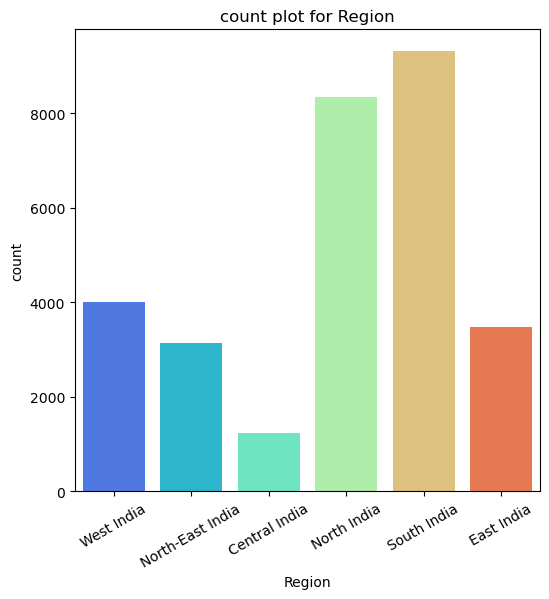

In [128]:
colmns=df.select_dtypes(include=['object']).columns.tolist()
for col in colmns[1:]:
    if df[col].nunique()<10:
        plt.figure(figsize=(6,6))
        sns.countplot(data=df,x=col,hue=col,palette='rainbow')
        plt.xticks(rotation=30)
        plt.title(f"count plot for {col}")
        plt.show()

* South India has the most data points<br>
* North India comes second (~8,000+ records)
Very good representation of northern cities (Delhi, Gurugram, Chandigarh, Jaipur, etc.)
* Very uneven distribution across regions<br>
South India and North India dominate (~60–70% of total data combined).<br>
Central India has the least data (~1,200–1,500 records) — likely because fewer monitoring stations or less consistent reporting in places like Talcher, Jorapokhar, Amaravati.<br>
West India, East India, and North-East India fall in the middle (3,000–4,000 each).<br>

In [129]:
df.drop(columns='Region',axis=1,inplace=True)

<Axes: >

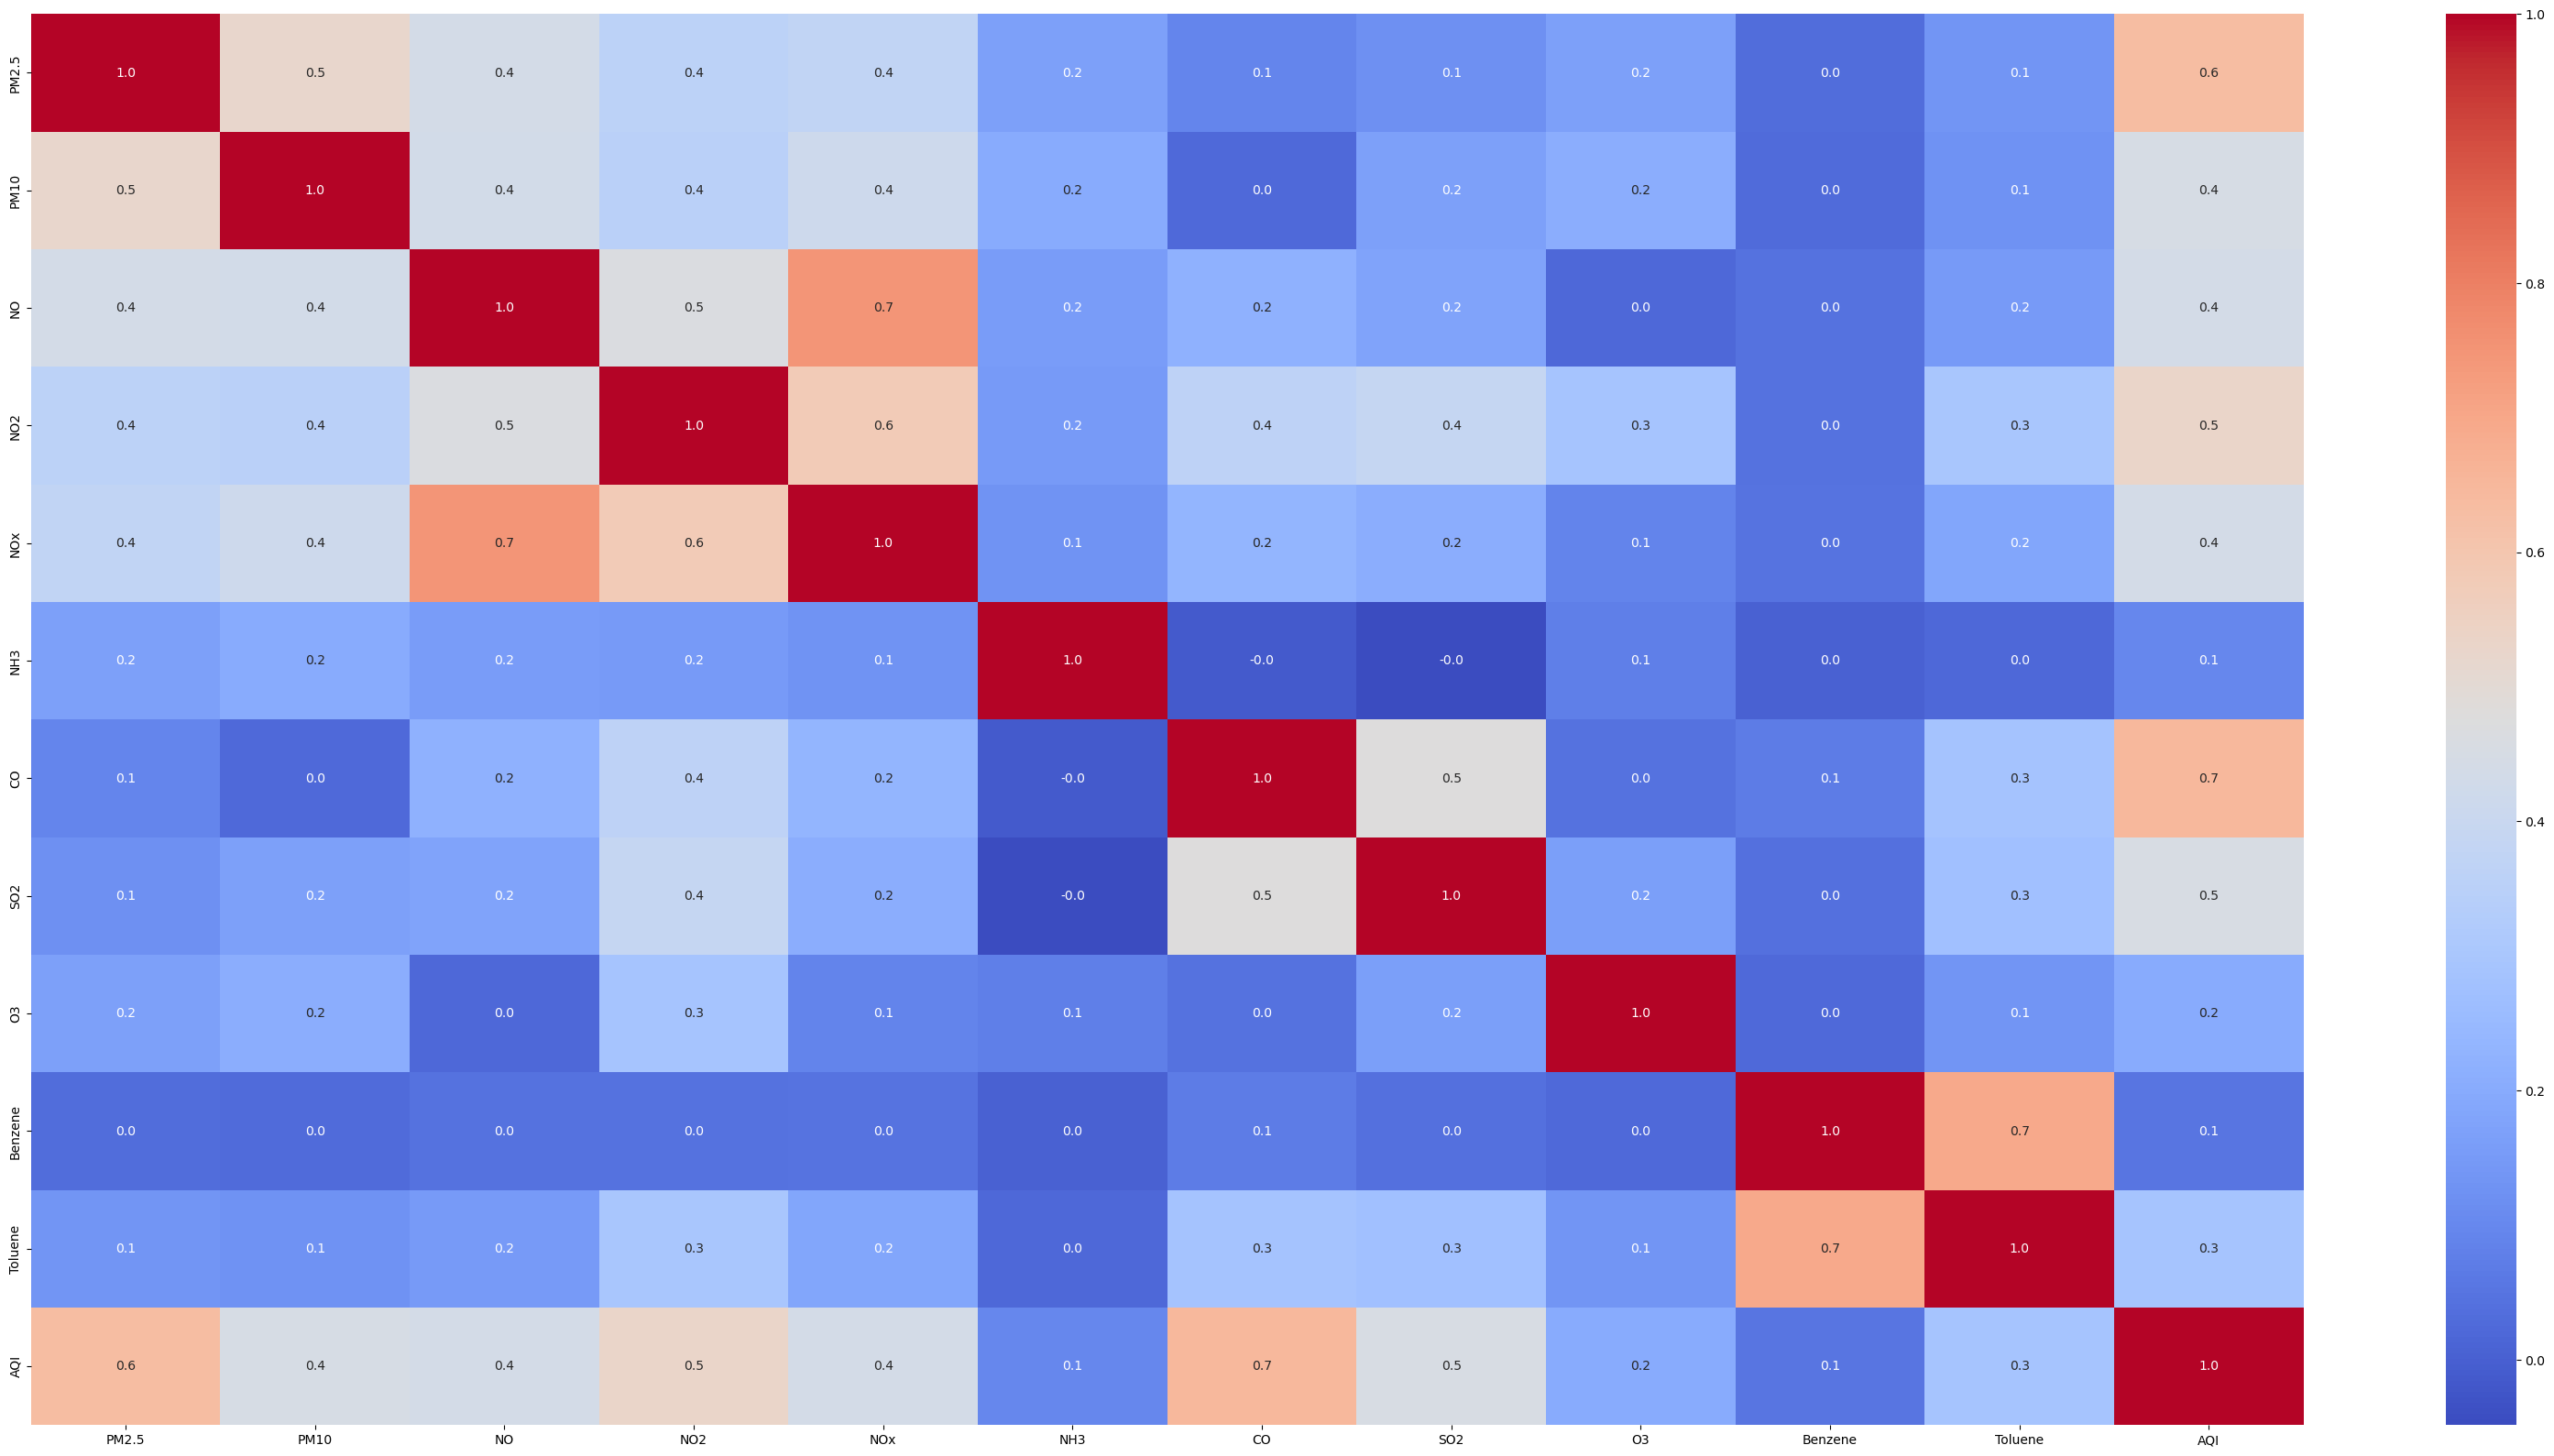

In [130]:
plt.figure(figsize=(40,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f')

In [131]:
corr=df.corr(numeric_only=True)
threshold=0.5
highly_correlated_pairs=[]
for i in range(len(corr)):
    for j in range(i):
        if abs(corr.iloc[i,j])>threshold:
            highly_correlated_pairs.append((corr.columns[i],corr.columns[j]))
highly_correlated_pairs

[('PM10', 'PM2.5'),
 ('NOx', 'NO'),
 ('NOx', 'NO2'),
 ('Toluene', 'Benzene'),
 ('AQI', 'PM2.5'),
 ('AQI', 'NO2'),
 ('AQI', 'CO')]

In [132]:
from sklearn.decomposition import PCA
import pandas as pd

cols_to_use = df[['PM10', 'PM2.5', 'NOx', 'NO', 'NO2', 'Toluene', 'Benzene', 'AQI', 'CO']]

x = cols_to_use
# Fit PCA
pca = PCA()  # keep all components first
pca.fit(x)

PCA()

In [133]:
cols_to_use = df[['PM10', 'PM2.5', 'NOx', 'NO', 'NO2', 'Toluene', 'Benzene', 'AQI', 'CO']]
cols_to_use

,PM10,PM2.5,NOx,NO,NO2,Toluene,Benzene,AQI,CO
0,95.68,48.57,17.15,0.92,18.22,0.02,0.00,118.0,0.92
1,95.68,48.57,16.46,0.97,15.69,5.50,3.68,118.0,0.97
2,95.68,48.57,29.70,17.40,19.30,16.40,6.80,118.0,17.40
3,95.68,48.57,17.97,1.70,18.48,10.14,4.43,118.0,1.70
4,95.68,48.57,37.76,22.10,21.42,18.89,7.01,118.0,22.10
...,...,...,...,...,...,...,...,...,...
29526,50.94,15.02,19.54,7.68,25.06,12.07,2.24,41.0,0.47
29527,74.09,24.38,16.53,3.42,26.06,2.21,0.74,70.0,0.52
29528,65.73,22.91,18.33,3.45,29.53,0.01,0.01,68.0,0.48
29529,49.97,16.64,18.80,4.05,29.26,0.00,0.00,54.0,0.52


In [134]:
# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Cumulative variance
cumulative_variance = explained_variance.cumsum()
print(cumulative_variance)


[7.31293690e-01 1.45294663e-01 5.91944980e-02 3.22520279e-02
 1.44584449e-02 9.68685810e-03 5.00015295e-03 2.23538479e-03
 5.84280901e-04]
[0.73129369 0.87658835 0.93578285 0.96803488 0.98249332 0.99218018
 0.99718033 0.99941572 1.        ]


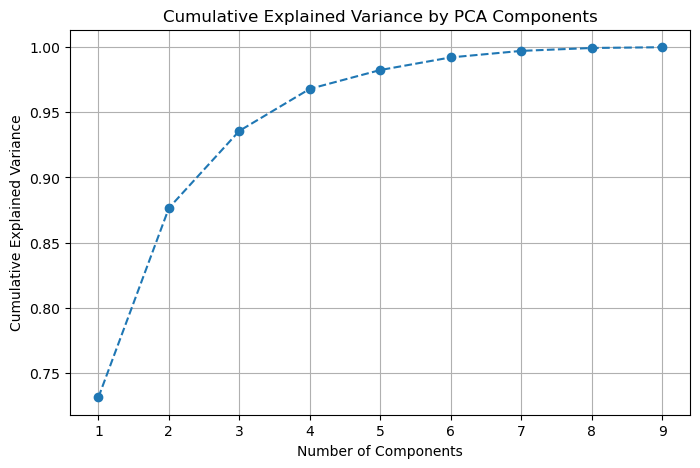

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [136]:
# Keep top k components
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(x)
print(X_pca.shape)  # will be (num_samples, 3)


(29531, 2)


In [137]:
df[num_cols].skew()

PM2.5       3.738370
PM10        2.855444
NO          4.182799
NO2         2.697408
NOx         2.852172
NH3         5.204659
CO          9.210144
SO2         4.424852
O3          1.495954
Benzene    23.633380
Toluene    13.490402
AQI         3.769751
dtype: float64

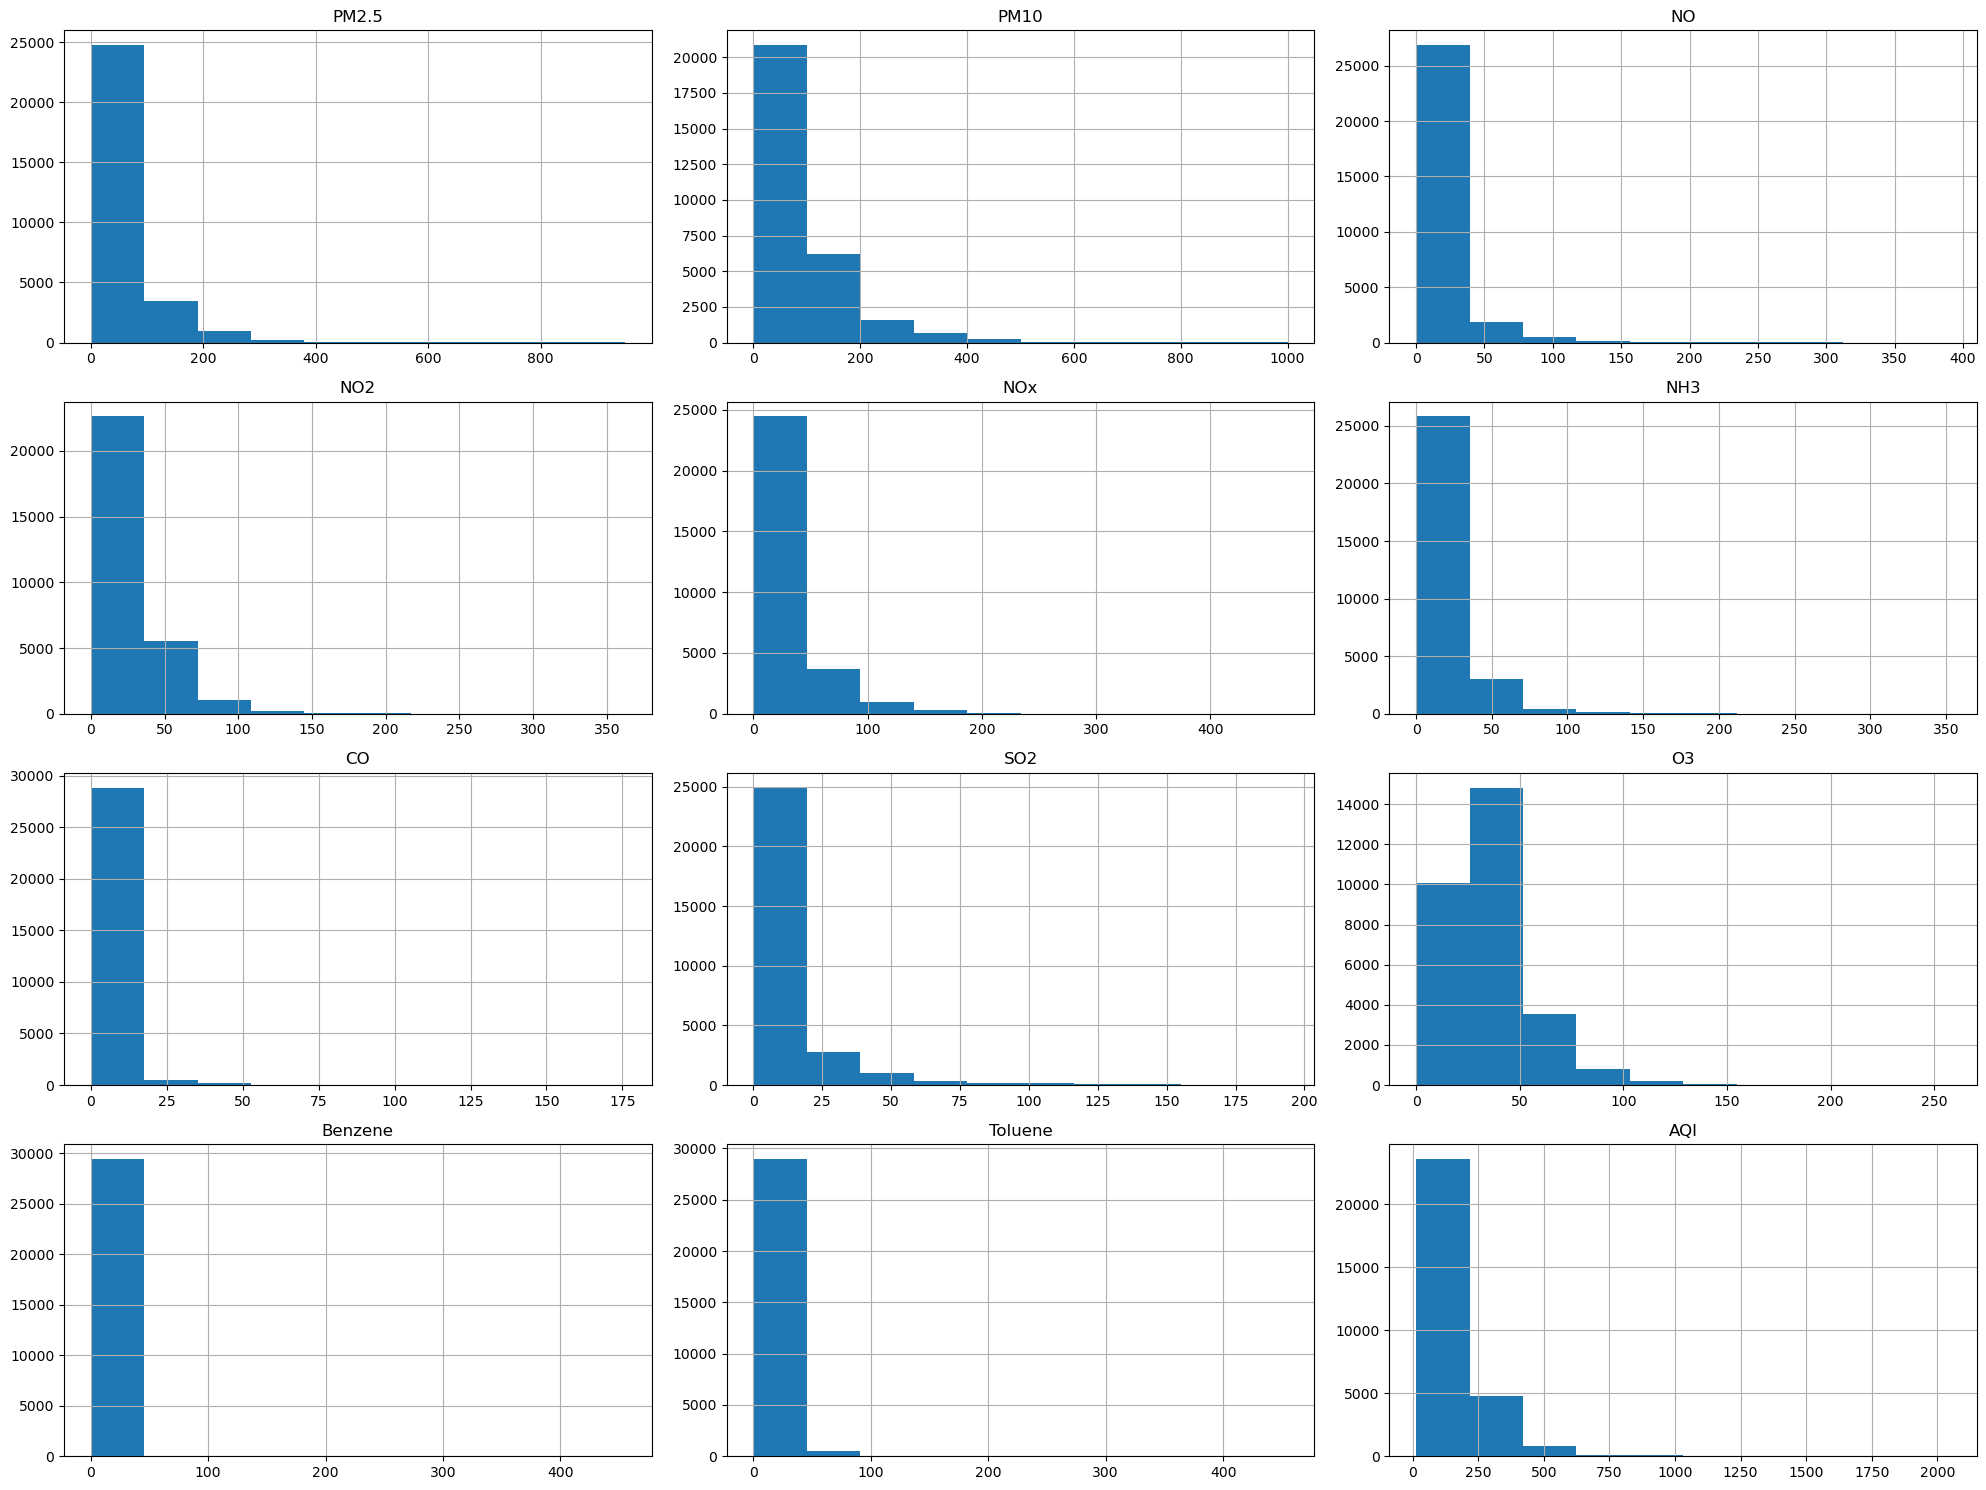

In [138]:
df.hist(figsize=(20,15))
plt.tight_layout()  

In [139]:
import numpy as np

# Apply log1p (handles zeros safely)
# df['Benzene'] = np.log1p(df['Benzene'])
# df['Toluene'] = np.log1p(df['Toluene'])
# df['CO'] = np.log1p(df['CO'])
# df['NO']=np.log1p(df['NO'])
# df['NH3']=np.log1p(df['NH3'])
# df['SO2']=np.log1p(df['SO2'])
# df['PM2.5']=np.log1p(df['PM2.5'])
# df['AQI']=np.log1p(df['AQI'])
# df['PM10']=np.log1p(df['PM10'])
# df['NO2']=np.log1p(df['NO2'])
# df['O3']=np.log1p(df['O3'])
# df['NOx']=np.log1p(df['NOx'])
# ... do the same for other highly skewed columns

In [140]:
df[num_cols].skew()

PM2.5       3.738370
PM10        2.855444
NO          4.182799
NO2         2.697408
NOx         2.852172
NH3         5.204659
CO          9.210144
SO2         4.424852
O3          1.495954
Benzene    23.633380
Toluene    13.490402
AQI         3.769751
dtype: float64

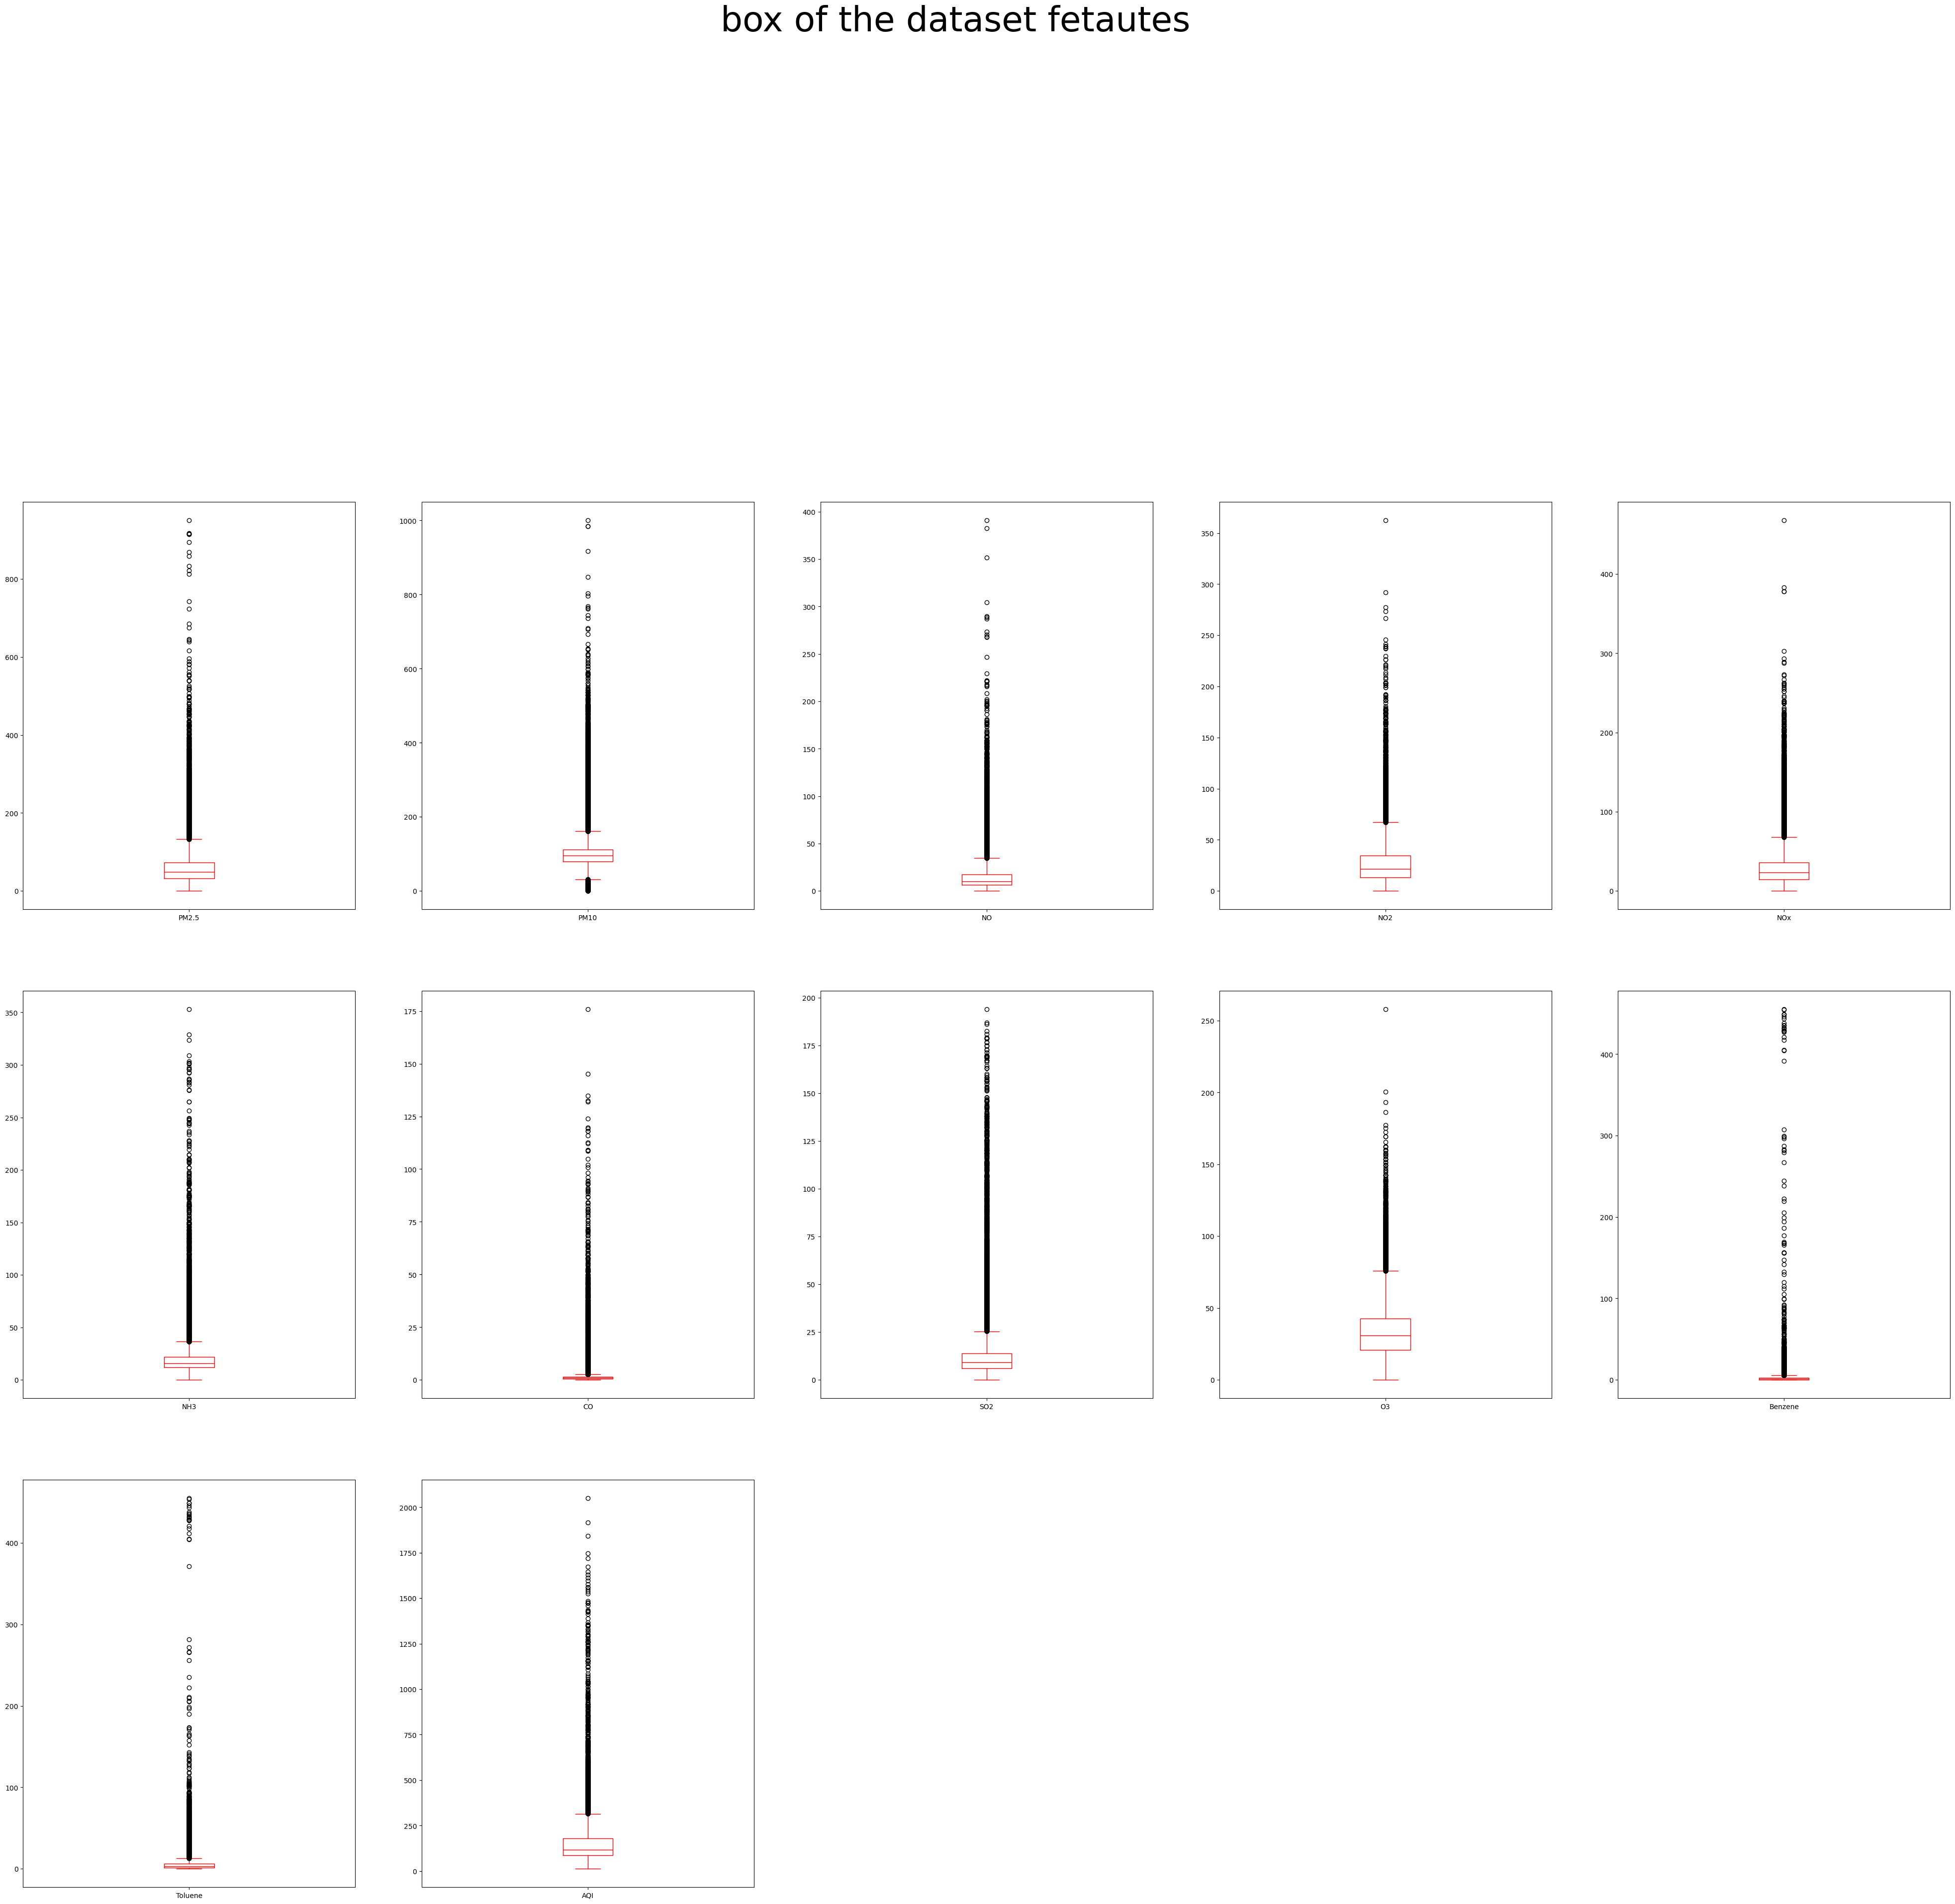

In [141]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='r')
plt.suptitle('box of the dataset fetautes', fontsize=50)
plt.show()


In [142]:
# outlier_percentage = {}

# for col in df.select_dtypes(include=['float64', 'int64']).columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
    
#     outliers = df[(df[col] < lower) | (df[col] > upper)]
#     percent = (len(outliers) / len(df)) * 100
#     outlier_percentage[col] = percent

# # Show percentage of outliers for each column
# for col, pct in outlier_percentage.items():
#     print(f"{col}: {pct:.2f}%")


In [143]:
df.shape

(29531, 14)

In [144]:
from scipy import stats
s_df = df.select_dtypes(include=['float64', 'int64'])[(np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]



In [145]:
# s_df.shape

### encoding

In [146]:
df['Date'] = pd.to_datetime(df['Date'])

In [147]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [148]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [149]:
le=LabelEncoder()
# le.fit_transform(df['City'])
# df['City']=le.fit_transform(df['City']) 
# df['City'].unique()

In [150]:
df.shape

(29531, 17)

# Model Training

##### scale the data

In [151]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'Year', 'Month', 'Day'],
      dtype='object')

In [152]:
# air_quality_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'AQI']
# ['PM2.5','PM10','NO2','SO2','CO','O3','NH3','Benzene','Toluene']
air_quality_features = [
    'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 
    'Benzene', 'Toluene']

available_features = [col for col in air_quality_features if col in df.columns]

if len(available_features) == 0:
    # Use all numeric columns if specific features aren't available
    available_features = list(df.columns)
    print(f"Using all available numeric features: {available_features}")
else:
    print(f"Using air quality features: {available_features}")

X = df[available_features].copy()

Using air quality features: ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'Benzene', 'Toluene']


In [153]:
available_features

['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'Benzene', 'Toluene']

In [154]:
air_quality_features

['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'Benzene', 'Toluene']

In [155]:
# from sklearn.preprocessing import minmax_scaleer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
# sc=RobustScaler()                      
sc=MinMaxScaler()
# df=sc.fit_transform(df)
scaled = sc.fit_transform(X)
s_df = pd.DataFrame(scaled, columns=X.columns)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled_df = pd.DataFrame(X_scaled, columns=available_features)


### Why I Chose MinMaxScaler 

I checked my data like this:

- Skew values are very high (most columns > 2 or 3, some > 10–23 like Benzene, Toluene)
- Boxplots show many extreme outliers (especially high values) and long right tails

**That's why I picked MinMaxScaler:**

- It keeps the extreme high pollution values strong and far from normal values  
- This helps the clustering see clear differences between "very bad days" and "normal days"

- If I use StandardScaler or RobustScaler, or remove/change outliers, the groups become mixed up and the score gets worse

MinMaxScaler works best here because it does **not destroy** the important high pollution values that make the real groups in the data.

## Hierarchical Clustering Model Training

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,10))
dendrogram=sch.dendrogram(sch.linkage(s_df,method='ward')) # ward,avaerage,
plt.title('dendrogram')
plt.xlabel("data ponits")
plt.ylabel("Eucliddean distance")
plt.show()

In [ ]:

hc=AgglomerativeClustering(n_clusters=3,linkage='complete')
lables=hc.fit_predict(s_df)

In [ ]:
s_df['cluster']=lables
s_df['cluster'].value_counts() 

In [ ]:
from sklearn.metrics import davies_bouldin_score
dbi=davies_bouldin_score(s_df,lables)
dbi

### Hierarchical Clustering Tuning

In [ ]:
best_params = {}
best_score = -1

linkages = ['ward', 'complete', 'average', 'single']
clusters_range = range(2, 11)

print("---- Hierarchical Tuning ----")

for link in linkages:
    for k in clusters_range:
        
        if link == 'ward':
            model = AgglomerativeClustering(n_clusters=k, linkage=link)
        else:
            model = AgglomerativeClustering(n_clusters=k, linkage=link, metric='euclidean')
        
        labels = model.fit_predict(s_df)
        score = silhouette_score(s_df, labels) 
        
        print(f"Linkage={link}, k={k} -> Silhouette={score}")
        
        if score > best_score:
            best_score = score
            best_params = {"linkage": link, "n_clusters": k}

print("\nBest Params:", best_params)
print("Best Silhouette:", best_score)

## K-Means Clustering Model Training

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ---------------- Baseline Model ----------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(s_df)

print("\n--- Baseline KMeans Evaluation ---")
print("Silhouette Score:", silhouette_score(s_df, k_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(s_df, k_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(s_df, k_labels))


#### K-Means Clustering Model Tuning

In [ ]:
best_k = 0
best_score_kmeans = -1

print("\n---- KMeans Tuning ----")

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10, )
    kmeans_labels = km.fit_predict(s_df)
    score = silhouette_score(s_df, kmeans_labels)

    print(f"K={k} -> Silhouette Score: {score}")

    if score > best_score_kmeans:
        best_score_kmeans = score
        best_k = k

print("\nBest K:", best_k)
print("Best Silhouette:", best_score_kmeans)


## DBSCAN Model Building + Tuning 



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# ---------------- Baseline Model ----------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
d_labels = dbscan.fit_predict(s_df)

print("\n--- Baseline DBSCAN Evaluation ---")

if len(set(d_labels)) > 1 and -1 not in set(d_labels):
    print("Silhouette Score:", silhouette_score(s_df, d_labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(s_df, d_labels))
    print("Davies-Bouldin Score:", davies_bouldin_score(s_df, d_labels))
else:
    print("DBSCAN produced noise or single cluster — evaluation skipped.")

print("Clusters found:", len(set(d_labels)) - (1 if -1 in d_labels else 0))
print("Noise points:", np.sum(d_labels == -1))


In [ ]:
best_params = {}
best_score_db = -1

eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 8, 10]

print("\n---- DBSCAN Tuning ----")

for eps in eps_values:
    for ms in min_samples_values:

        db = DBSCAN(eps=eps, min_samples=ms, random_state=42)
        db_labels = db.fit_predict(s_df)

        # Ignore bad cases
        if len(set(db_labels)) <= 1 or list(db_labels).count(-1) == len(db_labels):
            continue

        score = silhouette_score(s_df, db_labels)

        print(f"eps={eps}, min_samples={ms} -> Silhouette={score}")

        if score > best_score_db:
            best_score_db = score
            best_params = {"eps": eps, "min_samples": ms}

print("\nBest Params:", best_params)
print("Best Silhouette:", best_score_db)


## GMM Model Building + Tuning

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ---------------- Baseline Model ----------------
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
g_labels = gmm.fit_predict(s_df)

print("\n--- Baseline GMM Evaluation ---")
print("Silhouette Score:", silhouette_score(s_df, g_labels))
print("Calinski-Harabasz Score:", calinski_harabasz_score(s_df, g_labels))
print("Davies-Bouldin Score:", davies_bouldin_score(s_df, g_labels))


In [ ]:
best_params = {}
best_score_gmm = -1

components_range = range(2, 11)
cov_types = ['full', 'tied', 'diag', 'spherical']

print("\n---- GMM Tuning ----")

for k in components_range:
    for cov in cov_types:

        gmm = GaussianMixture(
            n_components=k,
            covariance_type=cov,
            random_state=42
        )

        gmm_labels = gmm.fit_predict(s_df)
        score = silhouette_score(s_df, gmm_labels)

        print(f"k={k}, cov={cov} -> Silhouette={score}")

        if score > best_score_gmm:
            best_score_gmm = score
            best_params = {"n_components": k, "covariance_type": cov}

print("\nBest Params:", best_params)
print("Best Silhouette:", best_score_gmm)


## FINAL MODEL 

After manually training, tuning parameters, and carefully comparing K-Means, DBSCAN, Agglomerative, and GMM one model at a time (no automated loops), I selected **Agglomerative Hierarchical Clustering** (ward linkage, 2 clusters) as the best — it gave the highest silhouette score and best separation of city pollution patterns.

In [168]:
hc=AgglomerativeClustering(linkage='ward',n_clusters=2)
labels=hc.fit_predict(s_df)

In [169]:
s_df['cluster']=labels 
s_df['cluster'].value_counts()  

cluster
1    25787
0     3744
Name: count, dtype: int64

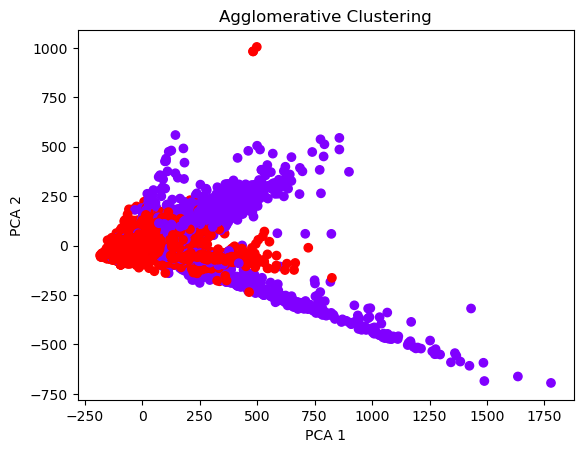

In [170]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels,cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')     
plt.show()

In [171]:
from sklearn.metrics import silhouette_score
sill_score=silhouette_score(s_df,labels)
print(sill_score)

0.8247808150919126


In [172]:
from sklearn.metrics import davies_bouldin_score
dbi=davies_bouldin_score(s_df,labels)
dbi 

0.37389482543662966

## 📊 Cluster Evaluation and Pattern Analysis

Cluster                 0       1
City                             
Ahmedabad           48.63   51.37
Aizawl               0.00  100.00
Amaravati            4.00   96.00
Amritsar             1.97   98.03
Bengaluru            1.00   99.00
Bhopal              14.53   85.47
Brajrajnagar         2.45   97.55
Chandigarh           0.00  100.00
Chennai              0.05   99.95
Coimbatore           0.00  100.00
Delhi               51.17   48.83
Ernakulam            0.00  100.00
Gurugram            11.73   88.27
Guwahati             4.18   95.82
Hyderabad            3.29   96.71
Jaipur               8.62   91.38
Jorapokhar          16.77   83.23
Kochi                0.00  100.00
Kolkata             18.06   81.94
Lucknow              1.29   98.71
Mumbai               1.59   98.41
Patna               28.63   71.37
Shillong             6.77   93.23
Talcher             18.70   81.30
Thiruvananthapuram   0.09   99.91
Visakhapatnam        5.68   94.32


<Figure size 1200x600 with 0 Axes>

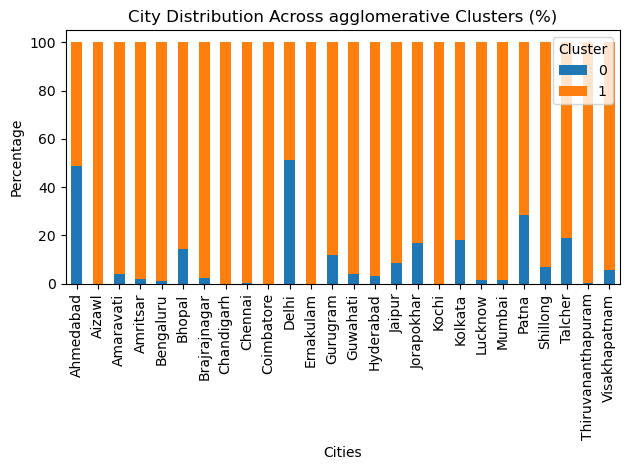

In [173]:
# ---------------------------------------------
# CITY vs CLUSTER DISTRIBUTION PLOT (PERCENTAGE)
# ---------------------------------------------

# Create dataframe with City + Cluster
df_city_clusters = df[['City']].copy()
df_city_clusters['Cluster'] = labels[:len(df_city_clusters)]

# Cross-tabulation with percentage
city_cluster_dist = pd.crosstab(
    df_city_clusters['City'],
    df_city_clusters['Cluster'],
    normalize='index'
) * 100
# normalize='index'=Shows row-wise proportions — each row sums to 1 (or 100%). This is what you used
print(city_cluster_dist.round(2))

# Plot stacked bar chart (NO manual colors needed)
plt.figure(figsize=(12,6))
city_cluster_dist.plot(kind='bar', stacked=True)

plt.title("City Distribution Across agglomerative Clusters (%)")
plt.xlabel("Cities")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [174]:
region_mapping = {
    # North India
    'Delhi': 'North India',
    'Chandigarh': 'North India',
    'Gurugram': 'North India',
    'Jaipur': 'North India',
    'Amritsar': 'North India',
    'Lucknow': 'North India',
    
    # South India
    'Bengaluru': 'South India',
    'Chennai': 'South India',
    'Kochi': 'South India',
    'Thiruvananthapuram': 'South India',
    'Coimbatore': 'South India',
    'Ernakulam': 'South India',
    'Visakhapatnam': 'South India',
    
    # East India
    'Kolkata': 'East India',
    'Guwahati': 'East India',
    'Patna': 'East India',
    'Shillong': 'East India',
    
    # West India
    'Ahmedabad': 'West India',
    'Mumbai': 'West India',
    
    # Central India
    'Bhopal': 'Central India',
    'Indore': 'Central India',  # If Indore appears later
    'Amaravati': 'Central India',
    
    # North-East India
    'Aizawl': 'North-East India',
    'Brajrajnagar': 'North-East India',
    'Jorapokhar': 'North-East India',
    'Talcher': 'North-East India',
    'Hyderabad': 'South India',  # Hyderabad is South/Central, but commonly grouped South
    'Visakhapatnam': 'South India'  # Already in South
}

# # Apply mapping (handle any missing cities gracefully)
df['Region'] = df['City'].map(region_mapping).fillna('Other/Unknown')


Cluster               0      1
Region                        
Central India      6.45  93.55
East India        20.69  79.31
North India       16.45  83.55
North-East India  12.46  87.54
South India        1.84  98.16
West India        25.11  74.89


<Figure size 1200x600 with 0 Axes>

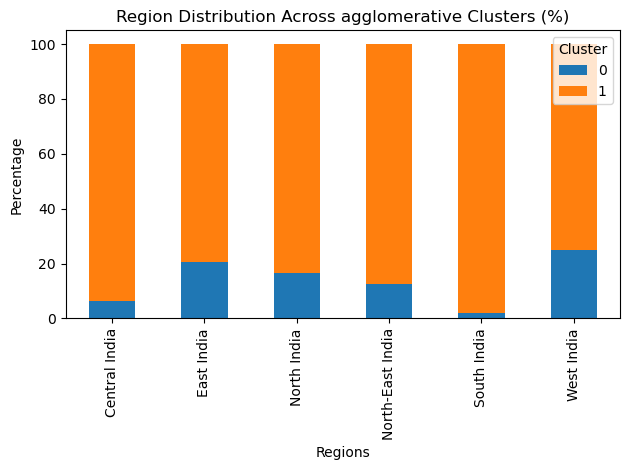

In [175]:
# ---------------------------------------------
# CITY vs CLUSTER DISTRIBUTION PLOT (PERCENTAGE)
# ---------------------------------------------

# Create dataframe with City + Cluster
df_city_clusters = df[['Region']].copy()
df_city_clusters['Cluster'] = labels[:len(df_city_clusters)]

# Cross-tabulation with percentage
city_cluster_dist = pd.crosstab(
    df_city_clusters['Region'],
    df_city_clusters['Cluster'],
    normalize='index'
) * 100

print(city_cluster_dist.round(2))

# Plot stacked bar chart (NO manual colors needed)
plt.figure(figsize=(12,6))
city_cluster_dist.plot(kind='bar', stacked=True)

plt.title("Region Distribution Across agglomerative Clusters (%)")
plt.xlabel("Regions")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Cluster Profiling Using Air Quality Features

In [176]:
# add cluster labels to original dataframe
df['cluster']=labels
df['cluster'].value_counts()

cluster
1    25787
0     3744
Name: count, dtype: int64

In [177]:
# summary statistics of air quality features by cluster
a=df.groupby("cluster")[["PM2.5","PM10","NO2","SO2","CO","O3"]].mean()
a

,PM2.5,PM10,NO2,SO2,CO,O3
cluster,,,,,,
0,116.842564,208.085852,58.407233,40.162949,8.880970,49.640737
1,56.912846,95.368880,23.272068,10.007761,1.177169,31.722397


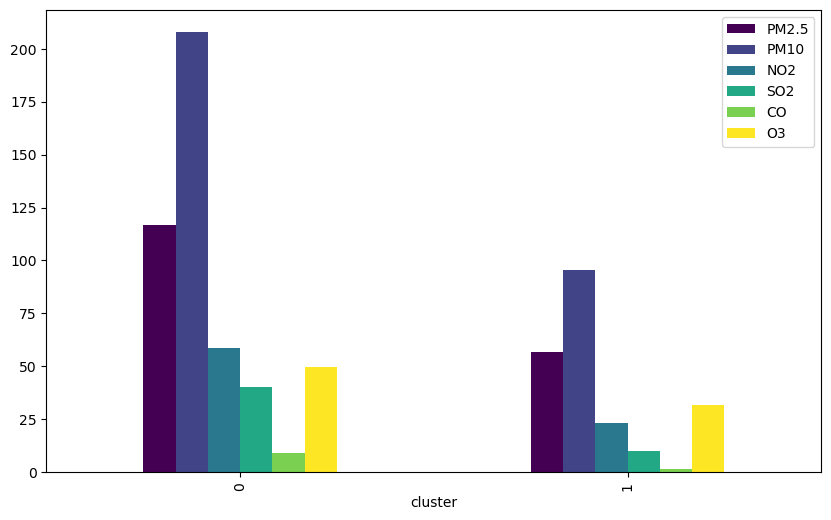

In [178]:
a.plot(kind="bar",figsize=(10,6),colormap="viridis")
plt.show()


## 🔴 Cluster 0 — High Pollution Cities  

Cluster 0 has **very high values** for all pollutants:  

- **PM2.5 (116.84)** – Small particles that affect breathing.  
- **PM10 (208.08)** – Dust and larger particles in the air.  
- **NO₂ (58.40)** – Mostly from vehicles and burning fuel.  
- **SO₂ (40.16)** – Comes from industries and power plants.  
- **CO (8.88)** – From car exhaust and incomplete burning.  
- **O₃ (49.64)** – Formed when polluted air reacts with sunlight.  

**Meaning:**  
This cluster shows **heavily polluted cities**. These places usually have **more traffic, industries, and seasonal smog**. People living in these cities may face **higher health risks**.  

---

## 🟢 Cluster 1 — Low to Moderate Pollution Cities  

Cluster 1 has **lower pollution levels**:  

- **PM2.5 (56.91)** – Moderate fine particles.  
- **PM10 (95.36)** – Less dust in the air.  
- **NO₂ (23.27)** – Less vehicle pollution.  
- **SO₂ (10.01)** – Low industrial emissions.  
- **CO (1.17)** – Cleaner air from less burning.  
- **O₃ (31.72)** – Lower secondary pollution.  

**Meaning:**  
This cluster represents **cleaner or moderately polluted cities**. These are often **coastal or less crowded areas** with better air movement and fewer industries.  


## Seasonal (Month-Wise) Cluster Pattern Analysis 

In [179]:
import pandas as pd
import calendar

# Suppose your original crosstab
month_cluster = pd.crosstab(df["Month"], df["cluster"], normalize="index")

# Convert the numeric index (1-12) to month names
month_cluster.index = month_cluster.index.map(lambda x: calendar.month_name[x])

month_cluster


cluster,0,1
Month,,
January,0.194582,0.805418
February,0.170126,0.829874
March,0.116042,0.883958
April,0.111399,0.888601
May,0.103155,0.896845
June,0.083600,0.916400
July,0.056922,0.943078
August,0.054253,0.945747
September,0.060746,0.939254


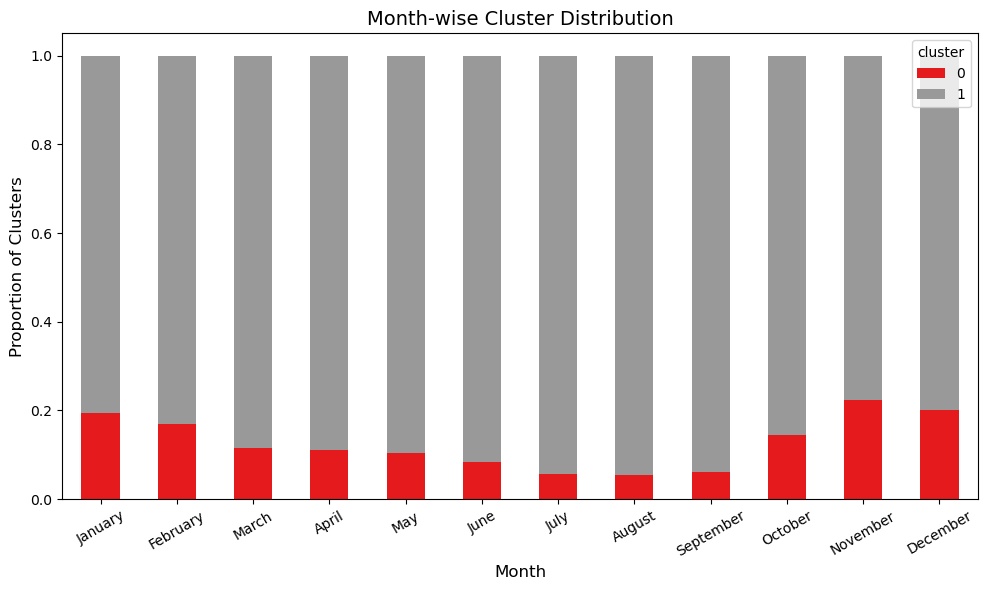

In [180]:
month_cluster.plot(kind="bar", 
                   stacked=True, 
                   figsize=(10,6), 
                   colormap="Set1")  # You can change the colormap

plt.title("Month-wise Cluster Distribution", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Proportion of Clusters", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 📅 Seasonal Cluster Insights  

The monthly cluster distribution shows a clear **seasonal pattern** in air pollution.  

- **Winter months (November–January)** have the highest share of **Cluster 0 (high pollution)**, reaching about **22% in November**. This shows that polluted conditions are more frequent during winter due to **reduced wind, temperature inversion, and increased emissions**.  

- **Monsoon months (June–September)** show the lowest presence of **Cluster 0 (around 5%–8%)**, meaning most observations fall into the **cleaner Cluster 1**. **Rain and stronger air movement** help remove pollutants from the atmosphere.  

- Pollution begins to rise again from **October**, peaks in **November**, and remains elevated through **December and January**, showing a **repeating yearly pollution cycle**.  

Overall, the clustering results capture **seasonal air-quality behavior**, proving that high pollution events are strongly linked to **winter conditions**, while cleaner air dominates during the **monsoon period**.  


# 📘 Final Project Report
# City-Wise Air Pollution Pattern Discovery Using Unsupervised Learning

## 📖 Introduction
Air pollution is a major environmental and public health issue in India, with differences across cities due to traffic, industrial activity, and geography.  
This project uses unsupervised machine learning to discover pollution patterns from air quality and weather data across multiple cities.

## 🎯 Objectives
- Clean and preprocess multi-city air quality and meteorological datasets.  
- Standardize pollutant features for clustering.  
- Apply unsupervised models (K-Means, DBSCAN, Hierarchical) to identify pollution patterns.  
- Analyze city-wise cluster distribution.  
- Generate insights to support region-specific air quality planning.

## 🗂 Dataset and Preprocessing
- Dataset contains PM2.5, PM10, NO₂, SO₂, CO, O₃, date, and city information.  
- Steps performed:
  - Handling missing values   
  - Scaling numerical features  
  - Extracting month from date

## 🤖 Modeling Approach
- Unsupervised learning techniques applied:
  - K-Means Clustering  
  - DBSCAN  
  - Hierarchical (Agglomerative) Clustering  
- Models evaluated using Silhouette Score and cluster stability.

## 🏙️ City-Wise Cluster Distribution
- Large urban and industrial cities often fall into high-pollution clusters.  
- Coastal and smaller cities generally show lower pollution.  
- Some cities show mixed behavior over time.

## 📊 Visualization
- Stacked bar charts and distribution plots were used to show:
  - City-wise cluster percentages  
  - Differences across pollutants  

## ✅ Key Findings
- Cities can be grouped into high-risk and lower-risk pollution clusters.  
- Particulate matter (PM2.5, PM10) and traffic emissions (NO₂, CO) are the main drivers.  
- Urban and industrial cities face higher pollution.  

## 🌍 Impact and Use Case
- Supports targeted city-level pollution control strategies.  
- Enables data-driven environmental policy design.  
- Helps identify public health risks.

## 🏁 Conclusion
Unsupervised machine learning reveals hidden air pollution patterns across Indian cities.  
City-wise analysis helps identify vulnerable regions, supporting smarter and more effective air quality management.


### Scaler Selection Justification – Why MinMaxScaler?

**Dataset characteristics** (Indian city air pollution data – city_day.csv):
- Very **heavy right skew** in most pollutants (PM2.5, PM10, CO, NO₂, NH₃, etc.)
- **Extreme outliers** present — especially during winter pollution episodes (Delhi smog, crop burning, Diwali fireworks → PM2.5 often > 500–900 µg/m³)

**Three main reasons MinMaxScaler gave better clustering results** (higher silhouette score, clearer seasonal & city patterns):

1. **Outliers contain important pollution signals**  
   Extreme high values represent **real severe pollution events** (winter inversion layers, stubble burning, festive spikes, industrial emissions).  
   Removing/capping them → lost meaningful cluster separation → worse silhouette score.

2. **Skew is meaningful in this domain**  
   Air pollution data is naturally right-skewed (most days are moderate/good, few days are extremely bad).  
   Applying log/Box-Cox transformation + StandardScaler flattens this natural tail → important high-pollution cluster boundaries become blurry → lower silhouette score.

**Why RobustScaler was not used (and gave similar poor results to StandardScaler)**  
RobustScaler (which uses median and IQR) is designed to reduce the influence of outliers compared to StandardScaler.  
However, in this pollution dataset:  
- The **outliers are not just noise** — they are the **core signal** of severe pollution episodes.  
- RobustScaler still compresses the extreme tail (like StandardScaler does after centering), reducing the separation between severe and moderate clusters.  
- As a result, **RobustScaler produced silhouette scores and cluster quality very similar to StandardScaler** — both worse than raw MinMaxScaler.

**Final Conclusion  
**MinMaxScaler was selected because it preserves the natural extremes and skewness of air pollution events — which are the most critical signals for identifying high-risk pollution clusters — while StandardScaler and RobustScaler both compress or flatten these extremes, resulting in poorer clustering quality and lower silhouette scores.**